In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
sns.set(rc={'figure.figsize': (18,6)})

In [2]:
car_df = pd.read_csv('Data/car_v2.csv')

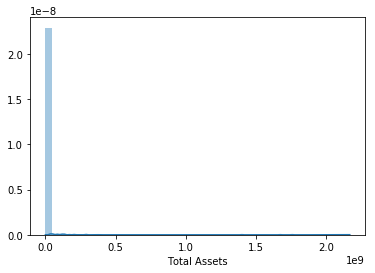

In [3]:
sns.distplot(car_df['Total Assets'])

In [4]:

#Pull specific rows and turn visualize as columns
car_df.ix[0]

Cert                                                   4829
Fed RSSD                                             746223
Bank Name                                         1880 Bank
City                                              Cambridge
State                                                    MD
Zip                                                   21613
Report Date                                         6/30/18
address                                     304 High Street
namehcr                           DELMARVA BANCSHARES, INC.
offdom                                                    6
mutual                                                Stock
Number Employees                                         48
Total Assets                                         343830
Cash & Bal Due DI                                     26199
Cash Balance IB                                       22763
Total Securities                                      35457
FedFunds Sold Rev Purch                 

In [14]:
#What are the available columns?
car_df.columns

Index(['Cert', 'Fed RSSD', 'Bank Name', 'City', 'State', 'Zip', 'Report Date',
       'address', 'namehcr', 'offdom',
       ...
       'Income Tax', 'Income before ext items', 'Extraordinary Gains',
       'Net Income', 'Minority Interest NI', 'Net income of bank and min int',
       'Net Charge-offs', 'Cash Dividends', 'Sale Conversion Ret Stock',
       'Net Operating Income'],
      dtype='object', length=126)

In [15]:
#descriptive statistics summary of a given column dataset
car_df['Net Income'].describe()

count    5.542000e+03
mean     2.094611e+04
std      3.328820e+05
min     -1.511630e+05
25%      4.190000e+02
50%      1.123500e+03
75%      2.898250e+03
max      1.387400e+07
Name: Net Income, dtype: float64

In [16]:
car_df['Cash Dividends'].describe()

count    5.542000e+03
mean     1.232963e+04
std      2.626885e+05
min      0.000000e+00
25%      0.000000e+00
50%      2.100000e+02
75%      9.247500e+02
max      1.150000e+07
Name: Cash Dividends, dtype: float64

In [17]:
car_df['Total Assets'].describe()

count    5.551000e+03
mean     3.173416e+06
std      4.968971e+07
min      8.210000e+02
25%      1.007200e+05
50%      2.149490e+05
75%      5.173910e+05
max      2.167700e+09
Name: Total Assets, dtype: float64

Definition of Kurtosis https://en.wikipedia.org/wiki/Kurtosis

In [20]:
print("Skewness: %f" % car_df['Cash Dividends'].skew())
print("Kurtosis: %f" % car_df['Cash Dividends'].kurt())

Skewness: 38.877394
Kurtosis: 1608.443522


In [21]:
print("Skewness: %f" % car_df['Total Assets'].skew())
print("Kurtosis: %f" % car_df['Total Assets'].kurt())

Skewness: 34.139223
Kurtosis: 1273.879947


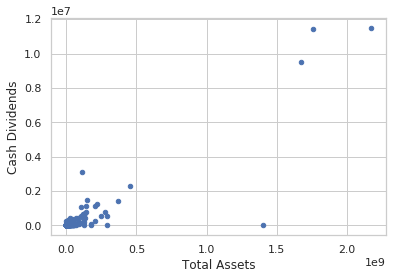

In [24]:
scatter1 = pd.concat([car_df['Total Assets'], car_df['Cash Dividends']], axis=1)
scatter1.plot.scatter(x='Total Assets', y='Cash Dividends')

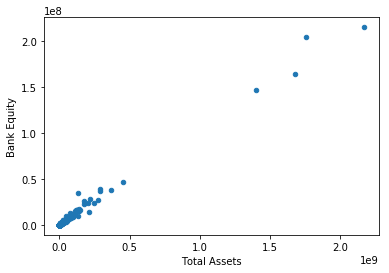

In [6]:
scatter1 = pd.concat([car_df['Total Assets'], car_df['Bank Equity']], axis=1)
scatter1.plot.scatter(x='Total Assets', y='Bank Equity')

In [ ]:
car_df.plot.scatter(x='Total Assets', y='Net Income');

In [5]:
# Show correlations
car_df.corr()

,Cert,Fed RSSD,Zip,offdom,Number Employees,Total Assets,Cash & Bal Due DI,Cash Balance IB,Total Securities,FedFunds Sold Rev Purch,...,Income Tax,Income before ext items,Extraordinary Gains,Net Income,Minority Interest NI,Net income of bank and min int,Net Charge-offs,Cash Dividends,Sale Conversion Ret Stock,Net Operating Income
Cert,1.000000,0.730264,-0.124642,-0.040320,-0.034424,-0.025161,-0.027433,-0.027221,-0.022646,-0.021157,...,-0.022104,-0.025758,-0.015631,-0.025821,-0.026574,-0.025861,-0.006052,-0.025422,0.056580,-0.025875
Fed RSSD,0.730264,1.000000,0.000387,-0.023467,-0.015659,-0.007428,-0.008533,-0.007928,-0.008281,-0.004166,...,-0.003476,-0.005623,-0.029553,-0.005807,-0.008422,-0.005821,0.003804,-0.006121,0.068382,-0.005601
Zip,-0.124642,0.000387,1.000000,-0.035568,-0.024693,-0.023824,-0.023342,-0.021641,-0.019517,-0.011463,...,-0.016935,-0.019115,0.003314,-0.019035,-0.030755,-0.019091,-0.020366,-0.013990,-0.020635,-0.019093
offdom,-0.040320,-0.023467,-0.035568,1.000000,0.884236,0.865834,0.713435,0.694481,0.804018,0.597795,...,0.838385,0.857675,0.003293,0.857495,0.399973,0.857614,0.443977,0.876747,0.075127,0.857542
Number Employees,-0.034424,-0.015659,-0.024693,0.884236,1.000000,0.966891,0.866700,0.848084,0.918128,0.710281,...,0.940965,0.942073,0.014833,0.941749,0.521499,0.942082,0.652592,0.843647,-0.009197,0.941511
Total Assets,-0.025161,-0.007428,-0.023824,0.865834,0.966891,1.000000,0.923719,0.908001,0.926482,0.793198,...,0.985750,0.987868,0.010711,0.987758,0.440433,0.987845,0.644782,0.899889,-0.005822,0.987447
Cash & Bal Due DI,-0.027433,-0.008533,-0.023342,0.713435,0.866700,0.923719,1.000000,0.999056,0.767257,0.935940,...,0.889327,0.893561,0.008529,0.893483,0.386197,0.893531,0.535606,0.808230,-0.035711,0.892670
Cash Balance IB,-0.027221,-0.007928,-0.021641,0.694481,0.848084,0.908001,0.999056,1.000000,0.743158,0.945931,...,0.871013,0.875543,0.007781,0.875474,0.373677,0.875510,0.516292,0.793306,-0.036456,0.874584
Total Securities,-0.022646,-0.008281,-0.019517,0.804018,0.918128,0.926482,0.767257,0.743158,1.000000,0.557070,...,0.921149,0.922270,0.012796,0.922047,0.467317,0.922266,0.627137,0.804950,-0.012618,0.922472
FedFunds Sold Rev Purch,-0.021157,-0.004166,-0.011463,0.597795,0.710281,0.793198,0.935940,0.945931,0.557070,1.000000,...,0.749009,0.751562,0.011685,0.751654,0.273074,0.751568,0.374237,0.702469,-0.032045,0.749965


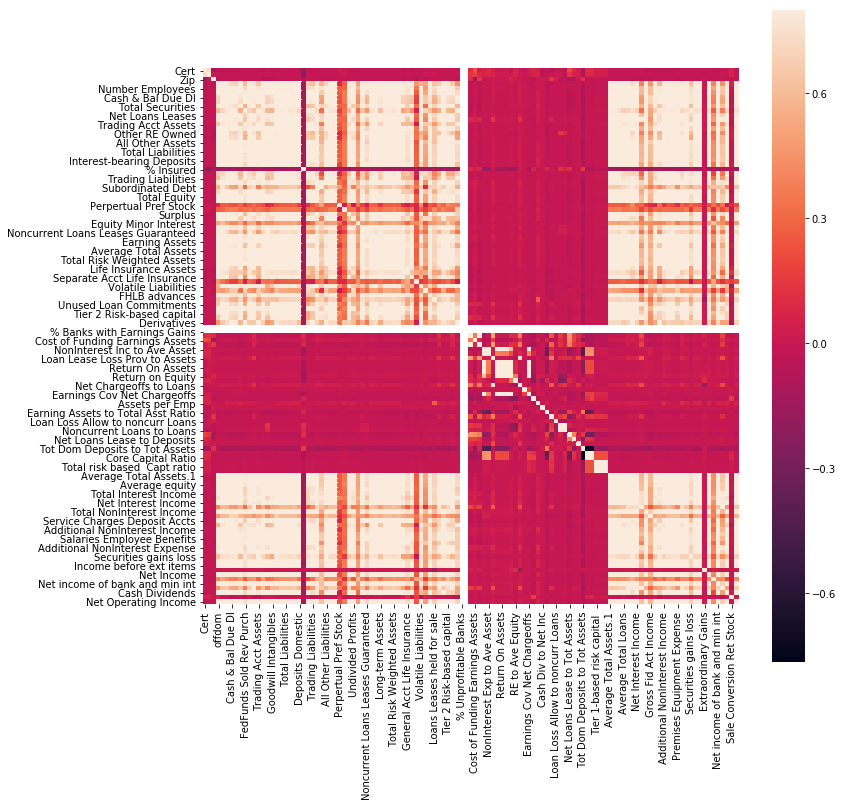

In [7]:
# Correlation visualization
corrmat = car_df.corr()
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

Boxplot Total Assets

boxplot documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html

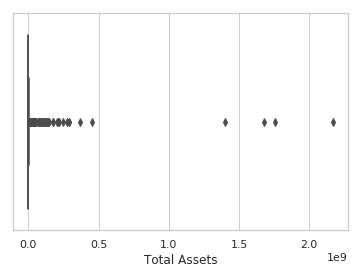

In [12]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=car_df["Total Assets"])

Pairplot


In [1]:
#sns.pairplot(car_df)

In [ ]:
#sns.heatmap(car_df.corr(),cmap='coolwarm',annot=True)

In [ ]:
#sns.clustermap(car_df)

In [5]:
from sklearn.preprocessing import StandardScaler

In [7]:
#standardizing data: Total Assets

total_assets_standardized = StandardScaler().fit_transform(car_df['Total Assets'][:,np.newaxis]);
low_range = total_assets_standardized[total_assets_standardized[:,0].argsort()][:20]
high_range= total_assets_standardized[total_assets_standardized[:,0].argsort()][-20:]
print('outer range (low) of the distribution:')
low_range

outer range (low) of the distribution:


array([[-0.06385389],
       [-0.0638013 ],
       [-0.06379469],
       [-0.0637767 ],
       [-0.06372107],
       [-0.06372069],
       [-0.06371493],
       [-0.06371167],
       [-0.06371089],
       [-0.06370736],
       [-0.06370179],
       [-0.06369539],
       [-0.06369404],
       [-0.06368935],
       [-0.06368671],
       [-0.06367937],
       [-0.06367826],
       [-0.06367192],
       [-0.06367126],
       [-0.06364211]])

In [8]:
print('\nouter range (high) of the distribution:')
high_range


outer range (high) of the distribution:


array([[ 2.64633027],
       [ 2.67060144],
       [ 2.73060174],
       [ 2.73066999],
       [ 2.89266197],
       [ 3.50797558],
       [ 3.53124195],
       [ 4.0030176 ],
       [ 4.11942486],
       [ 4.29354098],
       [ 4.8720856 ],
       [ 5.50764417],
       [ 5.77273002],
       [ 5.8079373 ],
       [ 7.36189604],
       [ 9.05399053],
       [28.06911634],
       [33.64990933],
       [35.34966991],
       [43.56478687]])

There are a few high variances as seen on above columns